In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The CHEMBL284 dataset corresponds to the human D(2) dopamine receptor, which is a target in drug discovery. The dataset contains:

Molecular compounds (represented as SMILES strings or graph struct|ures).
Bioactivity data (e.g., binding affinities, inhibition constants).

### 1. What is Dipeptidyl Peptidase IV (DPP-IV)?
DPP-IV is an enzyme involved in glucose metabolism.

It cleaves dipeptides from the N-terminal of polypeptides and is critical in inactivating incretin hormones such as **GLP-1** (glucagon-like peptide-1) and **GIP** (glucose-dependent insulinotropic polypeptide).

These hormones stimulate insulin secretion in response to meals, making DPP-IV a major target for **Type 2 Diabetes Mellitus (T2DM)** treatment.

Inhibitors of DPP-IV are widely used as antidiabetic drugs (e.g., Sitagliptin, Saxagliptin).


### 2. Dataset Context:
The CHEMBL284 dataset includes:

- Compounds tested for **inhibition or interaction** with DPP-IV.

- **Bioactivity data**: Values like IC50, Ki, and other measurements of enzymatic inhibition.

- **Assay data**: Information on experimental setups to determine compound activity.

### 3. Dataset Features:
Here are the key components of the CHEMBL284 dataset:

**Molecular Data:**

1. **SMILES:**

- A textual representation of chemical structures (e.g., "CC(C)CC1=CC=CC=C1O").

- Can be converted into molecular graphs for graph-based modeling (e.g., GCN).

2. **Molecular Descriptors:**

Precomputed features (e.g., molecular weight, logP, number of rotatable bonds) for traditional machine learning.

**Bioactivity Data:**

1. **IC50:**

- The concentration of the compound required to inhibit 50% of DPP-IV activity.
- Lower IC50 values indicate higher potency.
- Units: Usually in **nM** or **µM**.

2. **Ki:**

- The binding affinity constant of the inhibitor for DPP-IV.

- Lower Ki values indicate stronger binding.
Classification Labels (Optional):

Binary labels like Active or Inactive based on activity thresholds.
Assay Details:
Experimental conditions under which bioactivity data was measured.
Target Information:
Target ID: CHEMBL284
Target Name: Dipeptidyl Peptidase IV (DPP-IV)
Target Type: Single protein
Organism: Homo sapiens (human)


In [3]:
dataset = pd.read_csv('dataset/CHEMBL284_bioactivity.csv')
dataset.head()

,assay_chembl_id,canonical_smiles,molecule_chembl_id,standard_type,standard_units,standard_value,type,units,value
0,CHEMBL666573,N[C@@H](CC1CCCCC1)C(=O)N1CCCCC1,CHEMBL93558,IC50,nM,217000.0,IC50,uM,217.0
1,CHEMBL666573,C[C@H](N)C(=O)N1CCCC1,CHEMBL443622,IC50,nM,41000.0,IC50,uM,41.0
2,CHEMBL666573,O=C([C@@H]1CCCN1)N1CCCC1,CHEMBL403882,IC50,nM,15000.0,IC50,uM,15.0
3,CHEMBL666573,S=C(C1CCCN1)N1CCCC1,CHEMBL328655,IC50,nM,500000.0,IC50,uM,500.0
4,CHEMBL666573,NC(=O)CC(N)C(=O)N1CCCC1,CHEMBL328795,IC50,nM,188000.0,IC50,uM,188.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   assay_chembl_id     7109 non-null   object 
 1   canonical_smiles    7104 non-null   object 
 2   molecule_chembl_id  7109 non-null   object 
 3   standard_type       7109 non-null   object 
 4   standard_units      6916 non-null   object 
 5   standard_value      6765 non-null   float64
 6   type                7109 non-null   object 
 7   units               6678 non-null   object 
 8   value               6765 non-null   float64
dtypes: float64(2), object(7)
memory usage: 500.0+ KB


In [5]:
dataset[dataset['molecule_chembl_id'] == 'CHEMBL1422']

,assay_chembl_id,canonical_smiles,molecule_chembl_id,standard_type,standard_units,standard_value,type,units,value
1629,CHEMBL907105,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,18.00,IC50,nM,18.0000
1997,CHEMBL893277,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,18.00,IC50,nM,18.0000
2006,CHEMBL893216,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,18.00,IC50,nM,18.0000
2053,CHEMBL896429,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,18.00,IC50,nM,18.0000
2369,CHEMBL923806,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,18.00,IC50,nM,18.0000
...,...,...,...,...,...,...,...,...,...
6878,CHEMBL5112289,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,8.80,IC50,uM,0.0088
6880,CHEMBL5112297,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,Inhibition,%,44.93,INH,%,44.9300
6881,CHEMBL5112298,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,Inhibition,%,79.69,INH,%,79.6900
6987,CHEMBL5247172,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,CHEMBL1422,IC50,nM,20.00,IC50,nM,20.0000


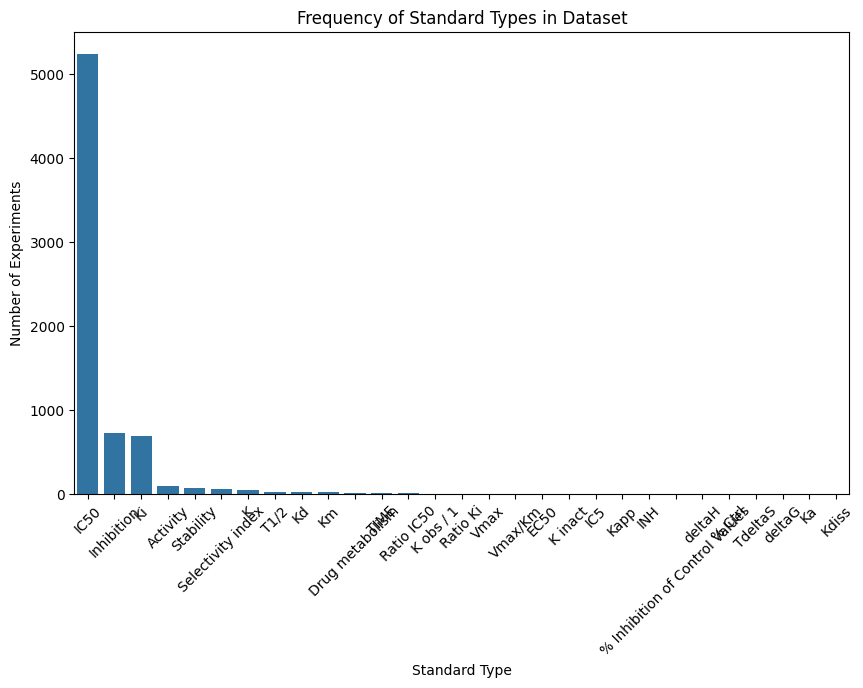

In [11]:
type_counts = dataset['standard_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Frequency of Standard Types in Dataset")
plt.xlabel("Standard Type")
plt.ylabel("Number of Experiments")
plt.xticks(rotation=45)
plt.show()

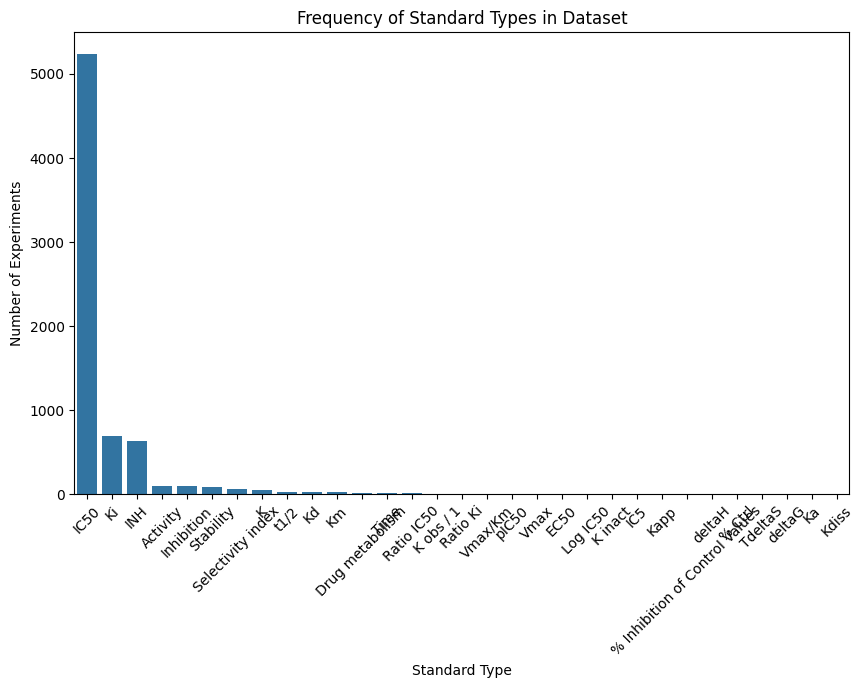

In [15]:
type_counts = dataset['type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Frequency of Standard Types in Dataset")
plt.xlabel("Standard Type")
plt.ylabel("Number of Experiments")
plt.xticks(rotation=45)
plt.show()

We shall take the IC50 experiment only for evaluation 

In [19]:
ic50_data = dataset[dataset['standard_type'] == 'IC50']
print(f'Shape of the dataset is: {ic50_data.shape}')

Shape of the dataset is: (5239, 9)


#### Checking for Null Values

In [35]:
def check_null_percentage(df):
    """
    Function to calculate the percentage of null values in each column of a DataFrame.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    
    Returns:
    pd.DataFrame: DataFrame containing columns and their respective null percentages.
    """
    null_percentage = (df.isnull().sum() / len(df)) * 100
    result = pd.DataFrame({
        'Column': null_percentage.index,
        'Null Percentage': null_percentage.values
    })
    return result

# Example usage on ic50_data
null_percentage_df = check_null_percentage(ic50_data)
null_percentage_df

,Column,Null Percentage
0,assay_chembl_id,0.000000
1,canonical_smiles,0.076350
2,molecule_chembl_id,0.000000
3,standard_type,0.000000
4,standard_units,1.450659
5,standard_value,1.546097
6,type,0.000000
7,units,1.565184
8,value,1.546097


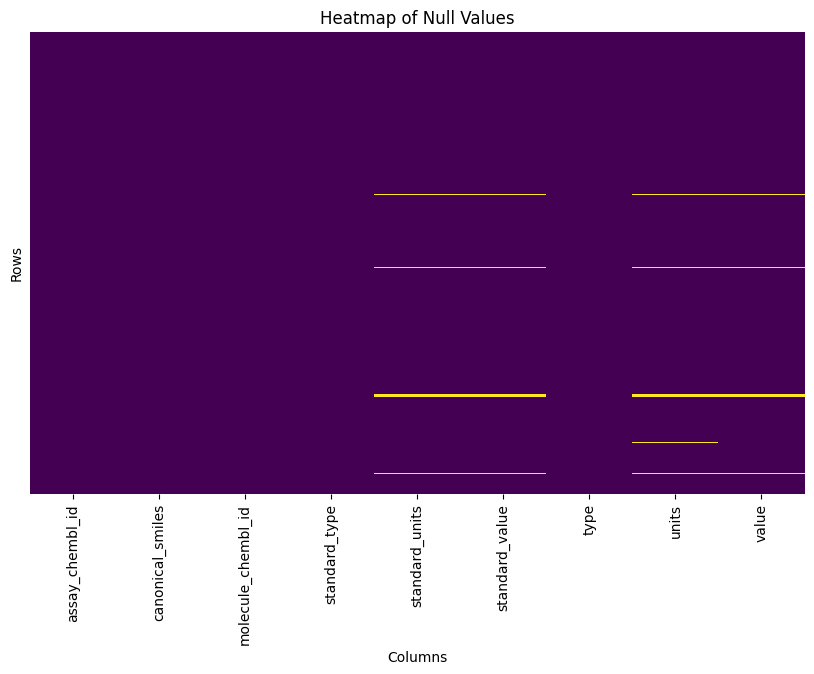

In [36]:
def draw_null_heatmap(df):
    """
    Function to draw a heatmap of null values in the DataFrame.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title("Heatmap of Null Values")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

# Draw heatmap for ic50_data
draw_null_heatmap(ic50_data)

In [37]:
def remove_null_values(df):
    """
    Function to remove rows with null values from the DataFrame.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    
    Returns:
    pd.DataFrame: DataFrame with rows containing null values removed.
    """
    cleaned_df = df.dropna()
    return cleaned_df

# Remove null values from ic50_data
ic50_data = remove_null_values(ic50_data)
null_percentage_df = check_null_percentage(ic50_data)
null_percentage_df

,Column,Null Percentage
0,assay_chembl_id,0.0
1,canonical_smiles,0.0
2,molecule_chembl_id,0.0
3,standard_type,0.0
4,standard_units,0.0
5,standard_value,0.0
6,type,0.0
7,units,0.0
8,value,0.0


#### **Converting the units to nM**

In [20]:
ic50_data['standard_units'].value_counts()

standard_units
nM         5115
ug.mL-1      48
Name: count, dtype: int64

So the dataset only contains 2 units of measurements that is `nM` and `ug.mL-1`. Now, we shall examine carefully at `ug.mL-1`

In [50]:
ug_ml_data = ic50_data[ic50_data['standard_units'] == 'ug.mL-1']
ug_ml_data.head(10)

,assay_chembl_id,canonical_smiles,molecule_chembl_id,standard_type,standard_units,standard_value,type,units,value,molecular_weight
198,CHEMBL666618,Cc1cccc(C)c1N1C(=O)c2ccc(N)cc2C1=O,CHEMBL283880,IC50,ug.mL-1,23.4,IC50,ug ml-1,23.4,266.300
200,CHEMBL666618,CC(C)c1cccc(C(C)C)c1N1C(=O)c2c(F)c(F)c(F)c(F)c...,CHEMBL151999,IC50,ug.mL-1,12.0,IC50,ug ml-1,12.0,395.421
202,CHEMBL666618,CC(C)c1cccc(C(C)C)c1N1C(=O)c2ccc(O)cc2C1=O,CHEMBL313952,IC50,ug.mL-1,21.3,IC50,ug ml-1,21.3,323.392
204,CHEMBL666618,CSc1ccccc1N1C(=O)c2cccc([N+](=O)[O-])c2C1=O,CHEMBL153236,IC50,ug.mL-1,100.0,IC50,ug ml-1,100.0,314.322
206,CHEMBL666618,Cc1cccc(C)c1N1C(=O)c2cccc(N)c2C1=O,CHEMBL315471,IC50,ug.mL-1,16.0,IC50,ug ml-1,16.0,266.300
208,CHEMBL666618,CC(C)c1cccc(C(C)C)c1N1C(=O)c2cccc(O)c2C1=O,CHEMBL88474,IC50,ug.mL-1,14.1,IC50,ug ml-1,14.1,323.392
210,CHEMBL666618,Cc1cccc(C)c1N1C(=O)c2cccc([N+](=O)[O-])c2C1=O,CHEMBL152529,IC50,ug.mL-1,100.0,IC50,ug ml-1,100.0,296.282
212,CHEMBL666618,CC(C)c1cccc(C(C)C)c1N1C(=O)c2ccc(N)cc2C1=O,CHEMBL90558,IC50,ug.mL-1,81.0,IC50,ug ml-1,81.0,322.408
214,CHEMBL666618,Cc1cccc(C)c1N1C(=O)c2ccccc2C1=O,CHEMBL8916,IC50,ug.mL-1,100.0,IC50,ug ml-1,100.0,251.285
216,CHEMBL666618,Cc1cccc(C)c1N1C(=O)c2cccc(O)c2C1=O,CHEMBL277841,IC50,ug.mL-1,100.0,IC50,ug ml-1,100.0,267.284


Finding the molecular weights

In [41]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_molecular_weight(smiles):
    """
    Calculate the molecular weight of a molecule from its SMILES string.
    
    Args:
    - smiles (str): SMILES representation of the molecule.
    
    Returns:
    - float: Molecular weight of the molecule.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolWt(mol)
    else:
        return None

ic50_data['molecular_weight'] = ic50_data['canonical_smiles'].apply(
                                        calculate_molecular_weight)
ic50_data.head()


,assay_chembl_id,canonical_smiles,molecule_chembl_id,standard_type,standard_units,standard_value,type,units,value,molecular_weight
0,CHEMBL666573,N[C@@H](CC1CCCCC1)C(=O)N1CCCCC1,CHEMBL93558,IC50,nM,217000.0,IC50,uM,217.0,238.375
1,CHEMBL666573,C[C@H](N)C(=O)N1CCCC1,CHEMBL443622,IC50,nM,41000.0,IC50,uM,41.0,142.202
2,CHEMBL666573,O=C([C@@H]1CCCN1)N1CCCC1,CHEMBL403882,IC50,nM,15000.0,IC50,uM,15.0,168.240
3,CHEMBL666573,S=C(C1CCCN1)N1CCCC1,CHEMBL328655,IC50,nM,500000.0,IC50,uM,500.0,184.308
4,CHEMBL666573,NC(=O)CC(N)C(=O)N1CCCC1,CHEMBL328795,IC50,nM,188000.0,IC50,uM,188.0,185.227


Change the ug.mL-1 unit to nM unit

$$\text{Concentration (nM)} = \frac{\text{Concentration (µg/mL)} \times 10^3}{\text{Molecular Weight (g/mol)}}$$

where:
- $\text{Concentration (µg/mL)}$: The concentration in micrograms per milliliter.
- $10^3$: Conversion factor from micrograms to nanograms
- $\text{Molecular Weight (g/mol)}$: The molar mass of the compound.

In [61]:
def convert_to_nM(dataframe):
    condition = dataframe['standard_units'] == 'ug.mL-1'
    dataframe.loc[condition, 'standard_value'] = (
        dataframe.loc[condition, 'standard_value'] * (10 ** 6)  \
                    / dataframe.loc[condition, 'molecular_weight']
    )
    dataframe.loc[condition, 'standard_units'] = 'nM'
    print('Values converted to nM successfully!')

convert_to_nM(ic50_data)


Values converted to nM successfully!


In [62]:
ic50_data['standard_units'].value_counts()

standard_units
nM    5148
Name: count, dtype: int64

#### Remove the duplicates of the `molecule_chembl_id`

The idea of selecting the **minimum IC50 value** for each molecule stems from the principles of **drug discovery and development**, where identifying the **most potent compound** is a primary goal.

- **Why Multiple Values Exist**:

A single molecule might be tested under different experimental conditions (e.g., different assays, concentrations, or setups).
Experimental variability can lead to slightly different IC50 values for the same molecule.

- **Rationale for Taking the Minimum**:

The lowest IC50 value represents the best-case scenario for the molecule's potency under experimental conditions.
This approach ensures that the most promising data point is used for downstream analysis, especially in screening and ranking molecules.

In [65]:
# Step 1: Filter the data to only include rows with standard units as 'nM'
filtered_data = ic50_data[ic50_data['standard_units'] == 'nM']

# Step 2: Remove duplicates by selecting the minimum standard_value for each molecule_chembl_id
unique_ic50_data = (
    filtered_data.loc[filtered_data.groupby('molecule_chembl_id')['standard_value'].idxmin()]
)

unique_ic50_data.reset_index(inplace = True, drop = True)

unique_ic50_data

,assay_chembl_id,canonical_smiles,molecule_chembl_id,standard_type,standard_units,standard_value,type,units,value,molecular_weight
0,CHEMBL666619,N[C@@H](CCNCc1ccc(Cl)cc1)C(=O)N1CC=CCC1,CHEMBL100370,IC50,nM,148000.0,IC50,uM,148.000,307.825
1,CHEMBL666619,NCC[C@H](NCc1ccccc1)C(=O)N1CCCCC1,CHEMBL100715,IC50,nM,1000000.0,IC50,uM,1000.000,275.396
2,CHEMBL666619,NC(N)=NCC[C@H](N)C(=O)N1CCCCC1,CHEMBL101401,IC50,nM,545000.0,IC50,uM,545.000,227.312
3,CHEMBL666619,NCC[C@H](N=C(N)N)C(=O)N1CCCCC1,CHEMBL101656,IC50,nM,1000000.0,IC50,uM,1000.000,227.312
4,CHEMBL1120123,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@@H]1C[C@@H]2C[C@H]...,CHEMBL1082345,IC50,nM,121.0,IC50,uM,0.121,432.952
...,...,...,...,...,...,...,...,...,...,...
4410,CHEMBL666619,N[C@@H](CCNCc1ccc(OCc2ccccc2)cc1)C(=O)N1CCCCC1,CHEMBL99247,IC50,nM,192000.0,IC50,uM,192.000,381.520
4411,CHEMBL666619,COc1ccc(CNCC[C@H](N)C(=O)N2CCCCC2)c(OC)c1,CHEMBL99260,IC50,nM,500000.0,IC50,uM,500.000,335.448
4412,CHEMBL666619,N[C@@H](CCNCc1ccccc1)C(=O)N1CCCCC1,CHEMBL99263,IC50,nM,247000.0,IC50,uM,247.000,275.396
4413,CHEMBL666619,N[C@@H](CCNCc1ccc(Cl)cc1)C(=O)N1CCC(F)CC1,CHEMBL99506,IC50,nM,70000.0,IC50,uM,70.000,327.831


Create a new dataset which selects only the columns: `canonical_smiles`, `molecule_chembl_id`, `standard_type`, `standard_units`, `value`

In [84]:
df = unique_ic50_data[['molecule_chembl_id', 'canonical_smiles', 
                       'standard_type', 'standard_units', 'standard_value', 'molecular_weight']]

df.columns = ['molecule_id', 'smiles', 'type', 'units', 'value', 'molecular_weight']
df.head()


,molecule_id,smiles,type,units,value,molecular_weight
0,CHEMBL100370,N[C@@H](CCNCc1ccc(Cl)cc1)C(=O)N1CC=CCC1,IC50,nM,148000.0,307.825
1,CHEMBL100715,NCC[C@H](NCc1ccccc1)C(=O)N1CCCCC1,IC50,nM,1000000.0,275.396
2,CHEMBL101401,NC(N)=NCC[C@H](N)C(=O)N1CCCCC1,IC50,nM,545000.0,227.312
3,CHEMBL101656,NCC[C@H](N=C(N)N)C(=O)N1CCCCC1,IC50,nM,1000000.0,227.312
4,CHEMBL1082345,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@@H]1C[C@@H]2C[C@H]...,IC50,nM,121.0,432.952


In [85]:
df['value']

0        148000.0
1       1000000.0
2        545000.0
3       1000000.0
4           121.0
          ...    
4410     192000.0
4411     500000.0
4412     247000.0
4413      70000.0
4414    1000000.0
Name: value, Length: 4415, dtype: float64

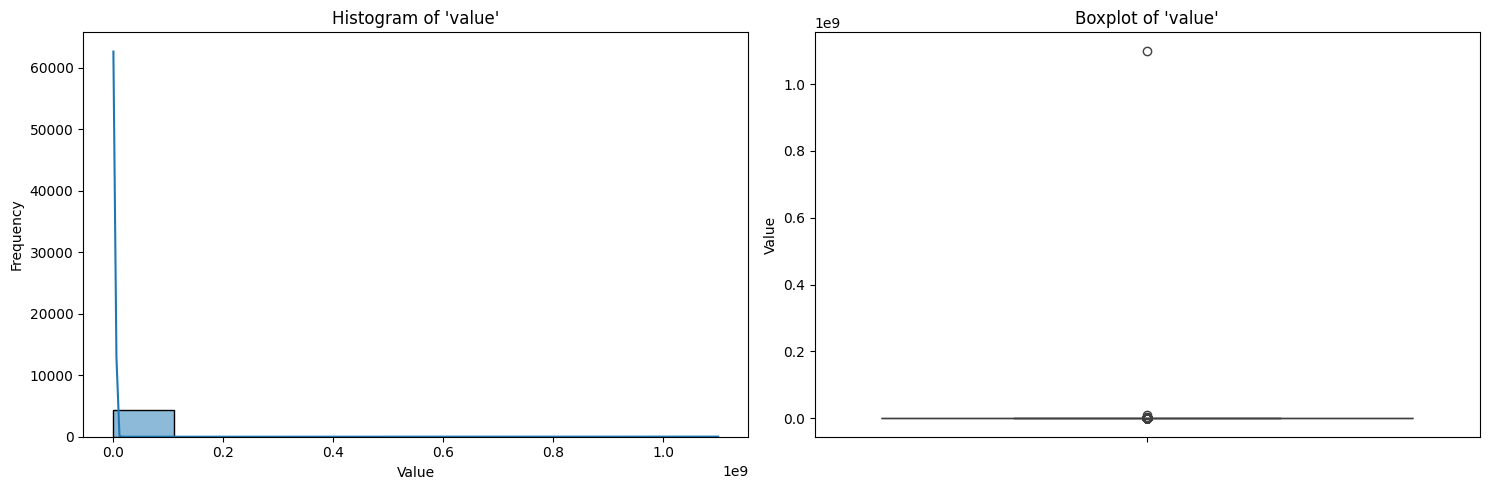

In [86]:
# Plot histogram and boxplot on the same line
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
sns.histplot(df['value'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histogram of 'value'")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(y=df['value'], ax=axes[1])
axes[1].set_title("Boxplot of 'value'")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()


This data contains the outlier so we can check that 

In [87]:
def detect_outliers(df, column):
    """
    Detect outliers in a column of a DataFrame using the IQR (Interquartile Range) method.

    Args:
    - df (pd.DataFrame): The input DataFrame.
    - column (str): The column name to check for outliers.

    Returns:
    - outliers (pd.Series): The outlier values.
    - cleaned_df (pd.DataFrame): DataFrame without outliers.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    # Remove outliers
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return outliers, cleaned_df

# Example usage
outliers, cleaned_df = detect_outliers(df, 'value')
outliers

0        148000.0
1       1000000.0
2        545000.0
3       1000000.0
49       100000.0
          ...    
4410     192000.0
4411     500000.0
4412     247000.0
4413      70000.0
4414    1000000.0
Name: value, Length: 924, dtype: float64

Changing the value of the outliers are highly risky since it introduces the false information of the experiment, we can use log-transformation to scale the range of the IC50 values to a smaller range. The value we should compute is $\text{pIC50}$. The formula is:

$$\text{pIC50} = -\log_{10}(\text{IC50 (nM)} \times 10^{-9})$$

/tmp/ipykernel_386/613680773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pIC50'] = -np.log10(df['value'] * 1e-9)


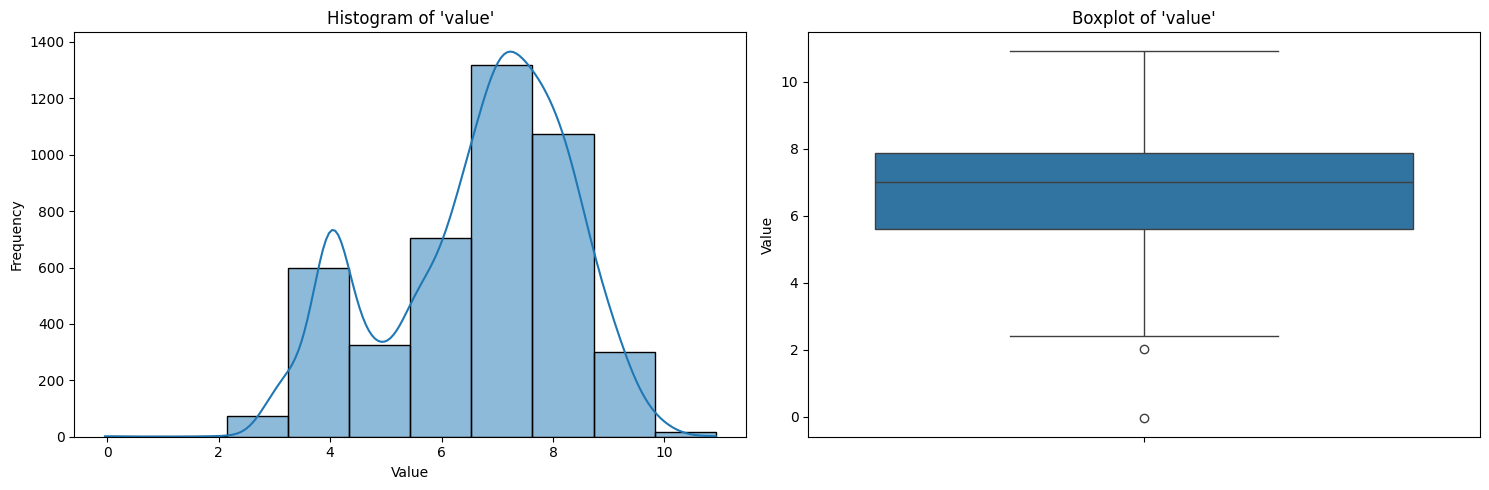

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['pIC50'] = -np.log10(df['value'] * 1e-9)
# Histogram
sns.histplot(df['pIC50'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histogram of 'value'")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(y=df['pIC50'], ax=axes[1])
axes[1].set_title("Boxplot of 'value'")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()


In [89]:
df.to_csv('CHEMBL284_final.csv', index = False)
print('Clean version of CHEMBL284 dataset has been saved')

Clean version of CHEMBL284 dataset has been saved
